# Assignment 3 Overview
In this assignment, we are asked to explore the California Housing dataset using various techniques, including Principal Component Analysis (PCA), clustering, and supervised learning algorithms.
The goal is to analyze and model housing prices in California based on different features.

In [1]:
from pathlib import Path
import pandas as pd

dataset = pd.read_csv(Path("housingCalifornia.csv"))

In [2]:
dataset

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


# Reading the dataset

## D1

In [3]:
# Configuration for saving images
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id,
    tight_layout=True,
    fig_extension="png",
    resolution=300,
    bbox_inches="tight",
    pad_inches=0.3,
    **kwargs,
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(
        path,
        format=fig_extension,
        dpi=resolution,
        bbox_inches=bbox_inches,
        pad_inches=pad_inches,
        **kwargs,
    )

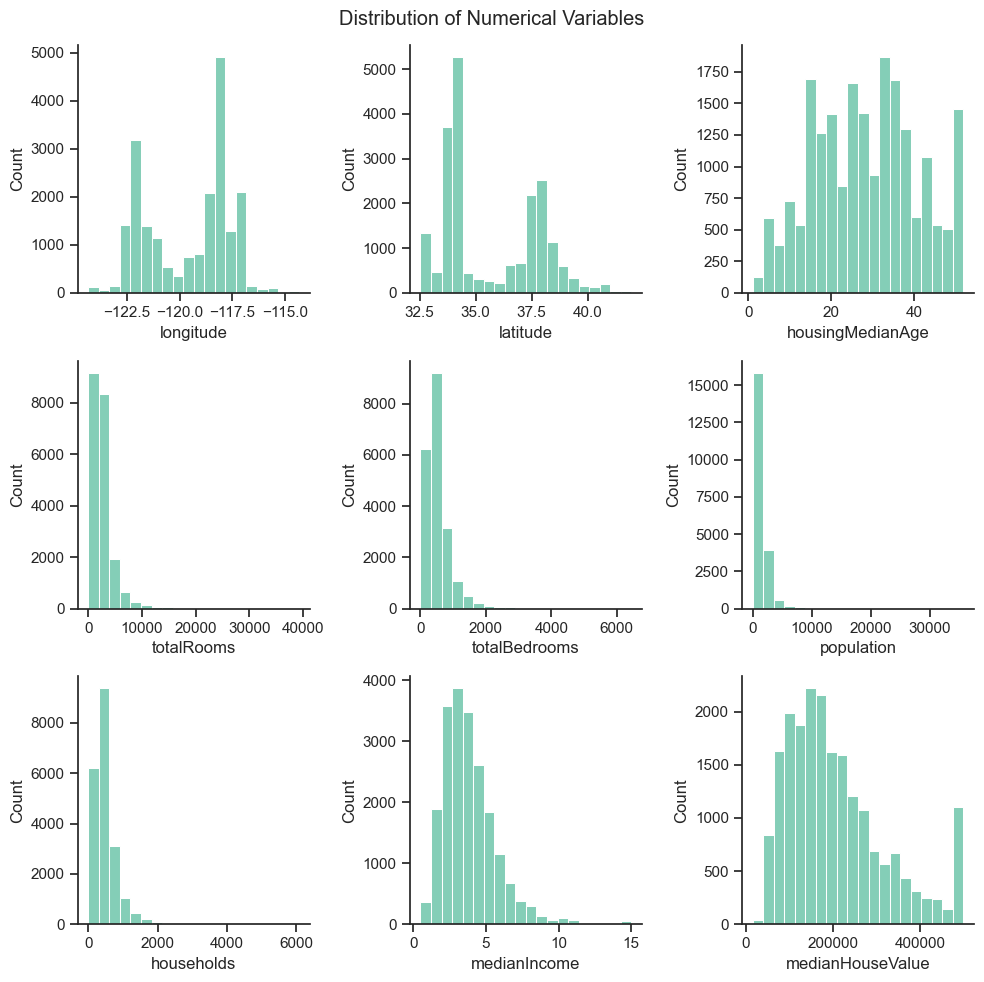

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
my_cmap = plt.get_cmap("Set2")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
numerical_data = dataset.drop(columns=["oceanProximity"])


for i, ax in enumerate(axes.flat):
    sns.histplot(
        data=numerical_data,
        x=numerical_data.columns[i],
        # log_scale=True,
        bins=20,
        ax=ax,
        alpha=0.8,
        color=my_cmap.colors[0],
        edgecolor="white",
    )
    # ax.set_title(numerical_data.columns[i])

fig.suptitle("Distribution of Numerical Variables")
save_fig("d1_a")

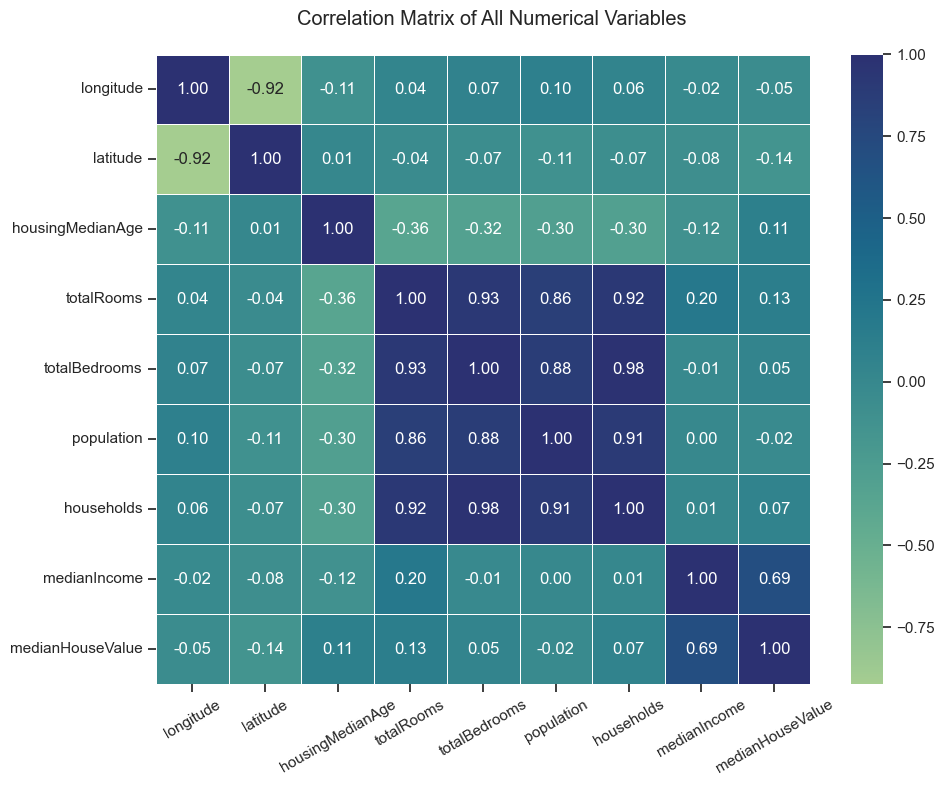

In [56]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html


# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle("Correlation Matrix of All Numerical Variables")
    sns.heatmap(corrmat, annot=True, linewidths=0.5, fmt=".2f", ax=ax, cmap="crest")
    plt.xticks(rotation=30)


plot_correlation_heatmap(numerical_data)
save_fig("d1_b")

In [6]:
target = dataset.iloc[:, -1].to_frame()
data = dataset.drop(columns=["medianHouseValue"])

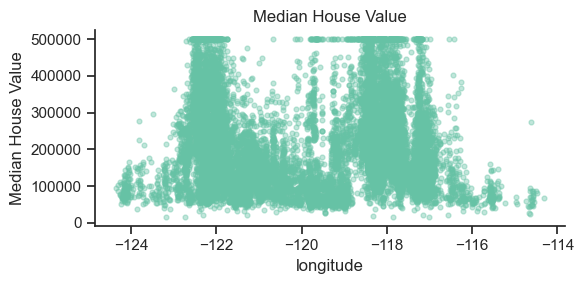

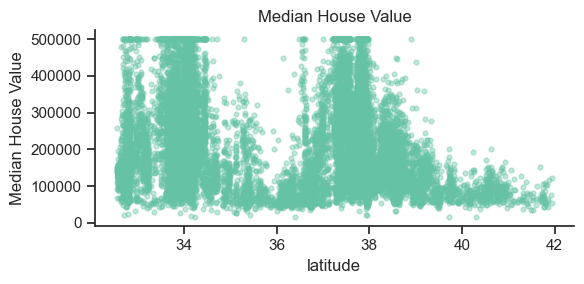

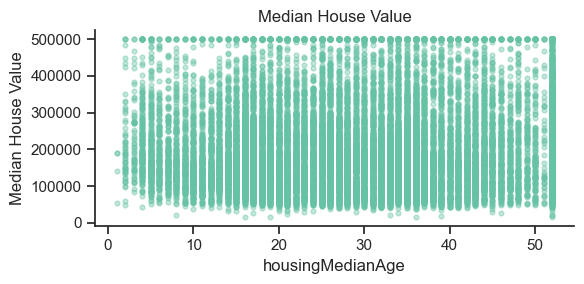

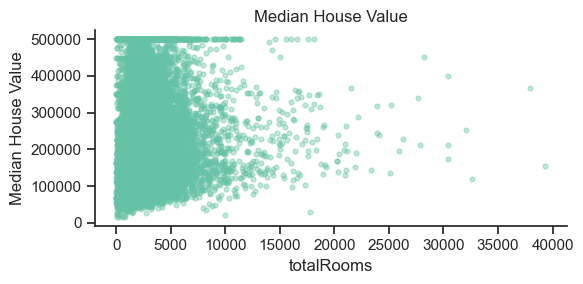

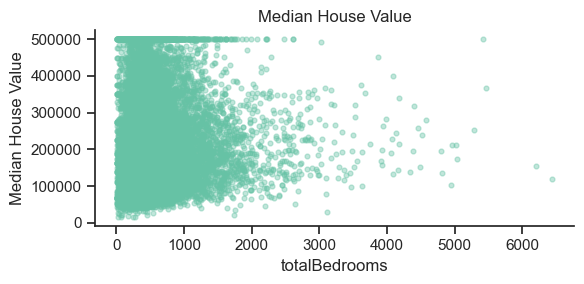

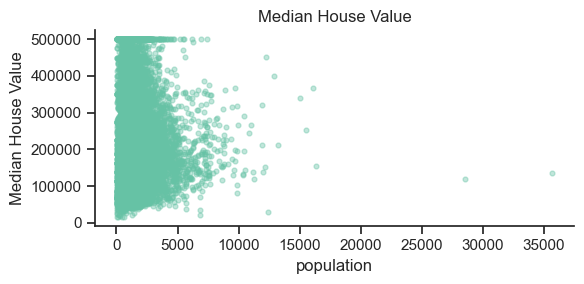

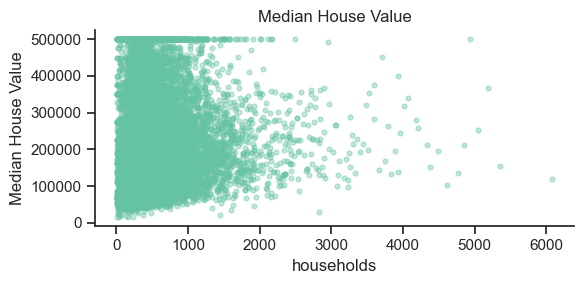

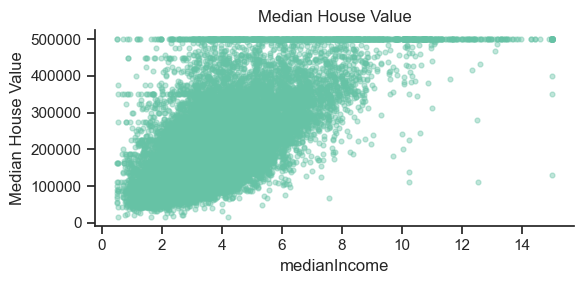

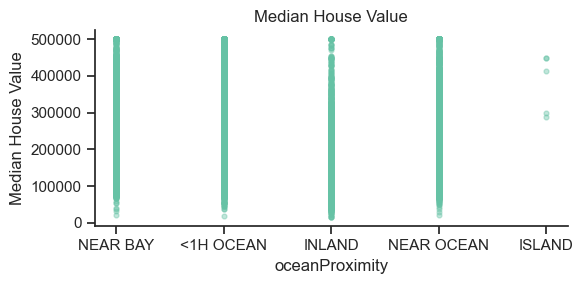

In [7]:
def plot_scatter(data, target, ylabel, i):
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.scatter(
        data.iloc[:, i], target.iloc[:, 0], alpha=0.4, color=my_cmap.colors[0], s=12
    )
    plt.xlabel(data.columns[i])
    plt.ylabel(ylabel)
    # ax.xaxis.set_minor_locator(AutoMinorLocator())
    plt.title(ylabel)
    save_fig(f"d1_c_{i}", tight_layout=True)


for i in range(data.shape[1]):
    plot_scatter(data, target, "Median House Value", i)

# Analysing the impact of different data transformations

In [8]:
dataset["oceanProximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
data1 = dataset.copy()

data1 = pd.get_dummies(
    data1, columns=["oceanProximity"], drop_first=True, prefix="oceanProximity"
)

In [10]:
data1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,True,False,False,False


In [11]:
data2 = data1.copy()

data2["medianHouseValue"] = data2["medianHouseValue"] / 100000

In [12]:
data2

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,4.526,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3.585,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,3.521,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,3.413,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,3.422,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0.781,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,0.771,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0.923,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0.847,True,False,False,False


## D2

In [13]:
from sklearn.model_selection import train_test_split

X1 = data1.drop("medianHouseValue", axis=1)
y1 = data1["medianHouseValue"]

X2 = data2.drop("medianHouseValue", axis=1)
y2 = data2["medianHouseValue"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=5508
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=5508
)

In [14]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

results = []


def get_train_test_RMSEs_coefficients(
    model, X_train, y_train, X_test, y_test, column_names
):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    RMSEs = [
        "{:.2f}".format(round(root_mean_squared_error(y_train, y_train_pred), 2)),
        "{:.2f}".format(round(root_mean_squared_error(y_test, y_test_pred), 2)),
    ]
    coefficients = pd.Series(model.coef_, index=column_names)
    return RMSEs, coefficients


# for each dataset
def train_models(X_train, y_train, X_test, y_test, column_names):
    RMSEs = []

    model1 = LinearRegression()
    model1_RMSE, model1_coefficients = get_train_test_RMSEs_coefficients(
        model1, X_train, y_train, X_test, y_test, column_names
    )
    RMSEs.extend(model1_RMSE)

    model2 = Lasso(alpha=100, random_state=5508)
    model2_RMSE, model2_coefficients = get_train_test_RMSEs_coefficients(
        model2, X_train, y_train, X_test, y_test, column_names
    )
    RMSEs.extend(model2_RMSE)

    # print(model2_coefficients)

    coefficients = pd.concat([model1_coefficients, model2_coefficients], axis=1)

    return RMSEs, coefficients


RMSEs1, coef1 = train_models(X1_train, y1_train, X1_test, y1_test, X1.columns)
RMSEs2, coef2 = train_models(
    X1_train_scaled, y1_train, X1_test_scaled, y1_test, X1.columns
)
RMSEs3, coef3 = train_models(X2_train, y2_train, X2_test, y2_test, X2.columns)
RMSEs4, coef4 = train_models(
    X2_train_scaled, y2_train, X2_test_scaled, y2_test, X2.columns
)

results.extend([RMSEs1, RMSEs2, RMSEs3, RMSEs4])

coefficient_df1 = pd.concat([coef1, coef2, coef3, coef4], axis=1)
coefficient_df1.columns = [
    "Data1 LR",
    "Data1 Lasso",
    "Data1 Standardised LR",
    "Data1 Standardised Lasso",
    "Data2 LR",
    "Data2 Lasso",
    "Data2 Standardised LR",
    "Data2 Standardised Lasso",
]

col_labels = [
    "Linear Regression (Train)",
    "Linear Regression (Test)",
    "Lasso Regression (Train)",
    "Lasso Regression (Test)",
]
row_labels = ["Data1", "Data1 Standardised", "Data2", "Data2 Standardised"]

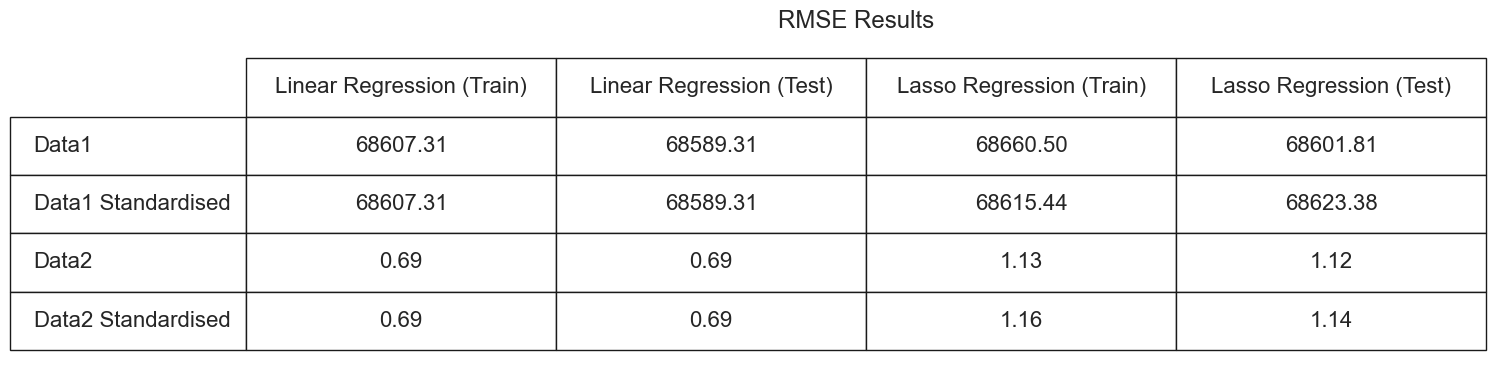

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=results,
    rowLabels=row_labels,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(16)
fig.suptitle("RMSE Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d2", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

RMSE is the square root of the average squared differences between the actual and predicted values. In this case, the RMSE values are affected by the predictions of the models.

As for linear regression models, the RMSE values for datasets whether standardised or not are the same. When features are standardised, the linear regression model's coefficients are scaled accordingly, and their predictions are the same. RMSE values for data2 and its standardised version are approximately 1/100000 of the RMSE values for data1 and its standardised version, because the unit of the target variable was changed to hundreds of thousands of dollars.

As for Lasso regression models, the regularisation terms was added to penalise the coefficients. The L1 penalty term in Lasso Regression is sensitive to the scale of the features and thus affects the coefficients and leads to different predictions.

## D3

In [16]:
data3 = data2.copy()

data3["meanRooms"] = data3["totalRooms"] / data3["households"]
data3["meanBedrooms"] = data3["totalBedrooms"] / data3["households"]
data3["meanOccupation"] = data3["population"] / data3["households"]

columns_to_drop = ["totalRooms", "totalBedrooms", "households", "population"]
data3.drop(columns_to_drop, axis=1, inplace=True)

X3 = data3.drop("medianHouseValue", axis=1)
y3 = data3["medianHouseValue"]

In [17]:
data3

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN,meanRooms,meanBedrooms,meanOccupation
0,-122.23,37.88,41,8.3252,4.526,False,False,True,False,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,False,False,True,False,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,False,False,True,False,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,False,False,True,False,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,False,False,True,False,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,True,False,False,False,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,True,False,False,False,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,True,False,False,False,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,True,False,False,False,5.329513,1.171920,2.123209


In [18]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=5508
)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

RMSEs5, coef5 = train_models(X3_train, y3_train, X3_test, y3_test, X3.columns)
RMSEs6, coef6 = train_models(
    X3_train_scaled, y3_train, X3_test_scaled, y3_test, X3.columns
)

results = []
results.extend([RMSEs5, RMSEs6])

coefficient_df2 = pd.concat([coef5, coef6], axis=1)
coefficient_df2.columns = [
    "Data3 LR",
    "Data3 Lasso",
    "Data3 Standadised LR",
    "Data3 Standadised Lasso",
]


row_labels = ["Data3", "Data3 Standardised"]

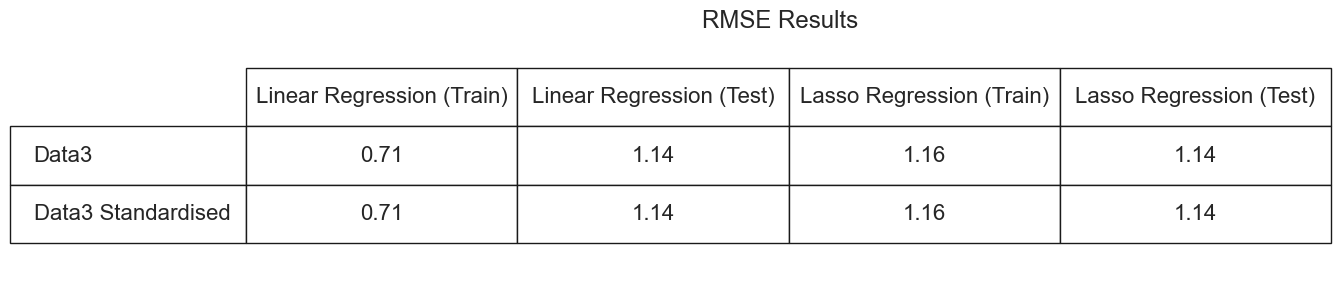

In [19]:
fig, ax = plt.subplots(figsize=(7, 3))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=results,
    rowLabels=row_labels,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(16)
fig.suptitle("RMSE Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d3", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [20]:
coefficient_df1

,Data1 LR,Data1 Lasso,Data1 Standardised LR,Data1 Standardised Lasso,Data2 LR,Data2 Lasso,Data2 Standardised LR,Data2 Standardised Lasso
longitude,-26533.237894,-26398.758516,-53194.886029,-50311.456263,-0.265332,-0.000000,-0.531949,-0.0
latitude,-25444.910842,-25420.759759,-54426.485960,-51488.495689,-0.254449,-0.000000,-0.544265,-0.0
housingMedianAge,1055.900145,1059.841818,13309.925998,13258.916154,0.010559,0.000000,0.133099,0.0
totalRooms,-6.428986,-6.433659,-14090.649431,-12015.246255,-0.000064,0.000104,-0.140906,0.0
totalBedrooms,102.935752,103.358469,43350.064293,41169.566341,0.001029,-0.000000,0.433501,0.0
population,-36.351577,-36.404325,-41771.495079,-41042.170587,-0.000364,-0.000118,-0.417715,-0.0
households,45.130509,44.807397,17290.240437,16763.782993,0.000451,-0.000000,0.172902,0.0
medianIncome,39305.206768,39291.424531,74889.216380,74413.038143,0.393052,0.000000,0.748892,0.0
oceanProximity_INLAND,-39134.844696,-38755.038140,-18231.721622,-19118.767645,-0.391348,-0.000000,-0.182317,-0.0
oceanProximity_ISLAND,153585.701929,0.000000,2672.207538,2593.777782,1.535857,0.000000,0.026722,0.0


In [21]:
coefficient_df2

,Data3 LR,Data3 Lasso,Data3 Standadised LR,Data3 Standadised Lasso
longitude,-0.261440,-0.0,-0.524144,-0.0
latitude,-0.248051,-0.0,-0.530580,-0.0
housingMedianAge,0.008409,0.0,0.105996,0.0
medianIncome,0.417373,0.0,0.795231,0.0
oceanProximity_INLAND,-0.381382,-0.0,-0.177674,-0.0
oceanProximity_ISLAND,1.526743,0.0,0.026564,0.0
oceanProximity_NEAR BAY,0.058689,0.0,0.018349,0.0
oceanProximity_NEAR OCEAN,0.083880,0.0,0.028015,0.0
meanRooms,-0.080115,0.0,-0.201913,0.0
meanBedrooms,0.490103,-0.0,0.239342,-0.0


# Analysing the impact of different models

## D4

In [22]:
from sklearn.model_selection import GridSearchCV

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=5508
)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

param_grid = {
    "alpha": [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=10)
grid_search.fit(X3_train_scaled, y3_train)

best_alpha = grid_search.best_params_["alpha"]
print("Optimal alpha = ", best_alpha)

best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X3_train_scaled, y3_train)

y3_train_pred = best_lasso.predict(X3_train_scaled)
y3_test_pred = best_lasso.predict(X3_test_scaled)

RMSE_train = round(root_mean_squared_error(y3_train, y3_train_pred), 2)
RMSE_test = round(root_mean_squared_error(y3_test, y3_test_pred), 2)

coefficients = pd.DataFrame(best_lasso.coef_, index=X3.columns)
coefficients.columns = ["Coefficient"]

table_content = [
    ["Optimal alpha", best_alpha],
    ["RMSE (training set)", RMSE_train],
    ["RMSE (test set)", RMSE_test],
]

Optimal alpha =  0.01


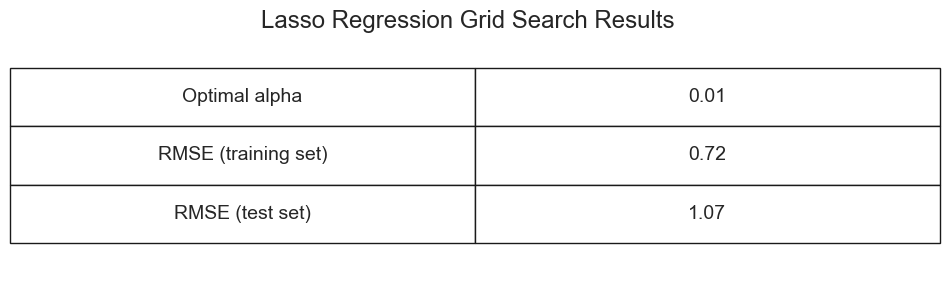

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=table_content,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)
fig.suptitle("Lasso Regression Grid Search Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d4", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [24]:
coefficients

,Coefficient
longitude,-0.246387
latitude,-0.240308
housingMedianAge,0.103832
medianIncome,0.724969
oceanProximity_INLAND,-0.274275
oceanProximity_ISLAND,0.019529
oceanProximity_NEAR BAY,0.017847
oceanProximity_NEAR OCEAN,0.031162
meanRooms,-0.033403
meanBedrooms,0.070794


## D5

In [25]:
from sklearn.linear_model import Ridge

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=5508
)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=10)
grid_search.fit(X3_train_scaled, y3_train)

best_alpha = grid_search.best_params_["alpha"]
print("Optimal alpha = ", best_alpha)

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X3_train_scaled, y3_train)

y3_train_pred = best_ridge.predict(X3_train_scaled)
y3_test_pred = best_ridge.predict(X3_test_scaled)

RMSE_train = round(root_mean_squared_error(y3_train, y3_train_pred), 2)
RMSE_test = round(root_mean_squared_error(y3_test, y3_test_pred), 2)

coefficients = pd.DataFrame(best_ridge.coef_, index=X3.columns)
coefficients.columns = ["Coefficient"]

table_content = [
    ["Optimal alpha", best_alpha],
    ["RMSE (training set)", RMSE_train],
    ["RMSE (test set)", RMSE_test],
]

Optimal alpha =  100


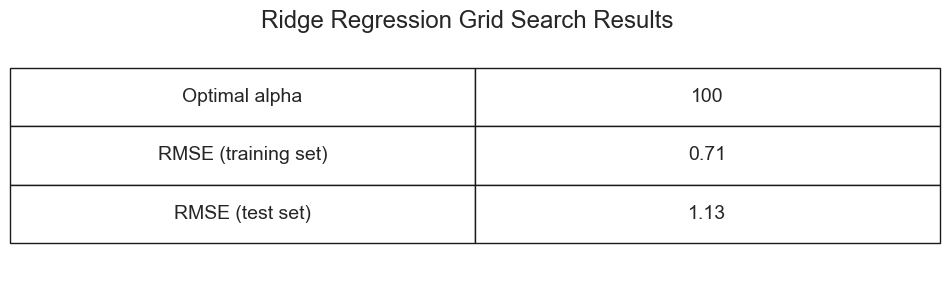

In [26]:
fig, ax = plt.subplots(figsize=(6, 3))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=table_content,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)
fig.suptitle("Ridge Regression Grid Search Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d5", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [27]:
coefficients

,Coefficient
longitude,-0.438580
latitude,-0.441902
housingMedianAge,0.106570
medianIncome,0.781283
oceanProximity_INLAND,-0.204392
oceanProximity_ISLAND,0.027128
oceanProximity_NEAR BAY,0.021768
oceanProximity_NEAR OCEAN,0.032337
meanRooms,-0.173267
meanBedrooms,0.209397


## D6

In [28]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_depth": list(range(3, 15, 1))}

decision_tree = DecisionTreeRegressor(random_state=5508)
grid_search = GridSearchCV(decision_tree, param_grid, cv=10)
grid_search.fit(X3_train_scaled, y3_train)

best_max_depth = grid_search.best_params_["max_depth"]

best_decision_tree = DecisionTreeRegressor(max_depth=best_max_depth, random_state=5508)
best_decision_tree.fit(X3_train_scaled, y3_train)

y3_train_pred = best_decision_tree.predict(X3_train_scaled)
y3_test_pred = best_decision_tree.predict(X3_test_scaled)

RMSE_train = "{:.2f}".format(round(root_mean_squared_error(y3_train, y3_train_pred), 2))
RMSE_test = "{:.2f}".format(round(root_mean_squared_error(y3_test, y3_test_pred), 2))

table_content = [
    ["Optimal 'max_depth'", best_max_depth],
    ["RMSE (training set)", RMSE_train],
    ["RMSE (test set)", RMSE_test],
]

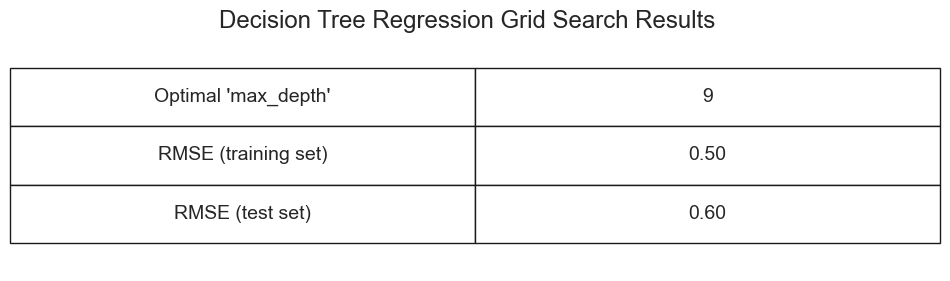

In [29]:
fig, ax = plt.subplots(figsize=(6, 3))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=table_content,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)
fig.suptitle("Decision Tree Regression Grid Search Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d6", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

## D8

In [30]:
columns_to_drop = [
    "oceanProximity_INLAND",
    "oceanProximity_ISLAND",
    "oceanProximity_NEAR BAY",
    "oceanProximity_NEAR OCEAN",
]

data3_numerical = data3.drop(columns_to_drop, axis=1)

y = data3_numerical["medianHouseValue"]
X = data3_numerical.drop(["medianHouseValue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5508
)

scaler4 = StandardScaler()
X_train_scaled = scaler4.fit_transform(X_train)
X_test_scaled = scaler4.transform(X_test)

The number of principal components necessary to preserve at least 90% of the variance =  5


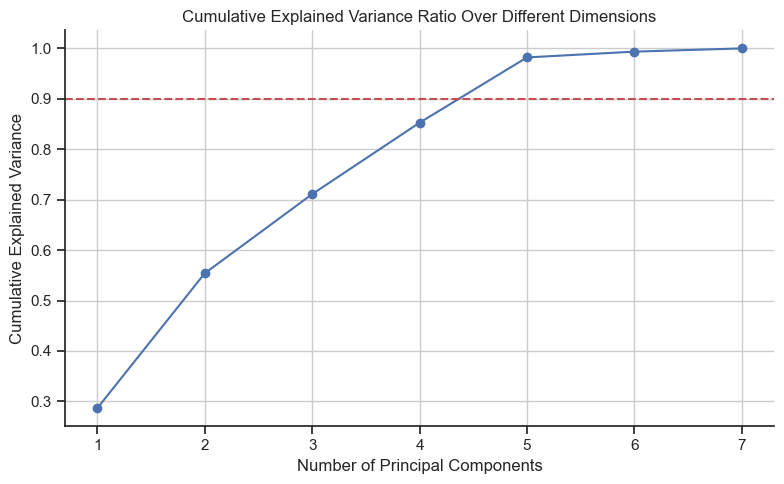

In [31]:
from sklearn.decomposition import PCA

pca = PCA(random_state=5508)
pca.fit(X_train_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(
    "The number of principal components necessary to preserve at least 90% of the variance = ",
    n_components,
)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
    linestyle="-",
)
plt.axhline(y=0.90, color="r", linestyle="--")  # Add horizontal line at y=0.90
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Ratio Over Different Dimensions")
plt.grid()
save_fig("d8_explained_variance_plot")
plt.show()

In [32]:
pca = PCA(n_components=0.90)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

linear_regression = LinearRegression()
linear_regression.fit(X_train_reduced, y_train)

y_train_pred = linear_regression.predict(X_train_reduced)
RMSE_train = round(root_mean_squared_error(y_train, y_train_pred), 4)

y_test_pred = linear_regression.predict(X_test_reduced)
RMSE_test = round(root_mean_squared_error(y_test, y_test_pred), 4)

table_content = [
    ["RMSE (training set)", RMSE_train],
    ["RMSE (test set)", RMSE_test],
]

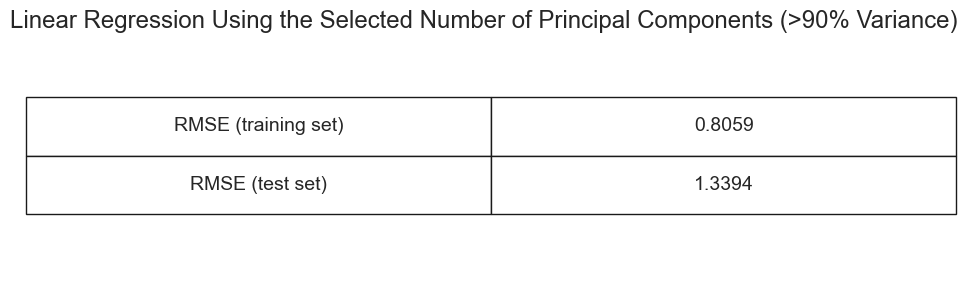

In [33]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=table_content,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)
fig.suptitle(
    "Linear Regression Using the Selected Number of Principal Components (>90% Variance)",
    fontsize="x-large",
)

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d8", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

In [34]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PCA(random_state=5508), LinearRegression())

n_features = len(X.columns)
param_grid = {"pca__n_components": list(range(1, n_features + 1))}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=10, scoring="neg_root_mean_squared_error"
)
grid_search.fit(X_train_scaled, y_train)

best_n_components = grid_search.best_params_["pca__n_components"]
print(
    "The obtained optimal number of principal components according to grid search = ",
    best_n_components,
)

The obtained optimal number of principal components according to grid search =  7


In [35]:
pca = PCA(best_n_components, random_state=5508)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

linear_regression = LinearRegression()
linear_regression.fit(X_train_pca, y_train)

X_train_pred = linear_regression.predict(X_train_pca)
RMSE_train = "{:.4f}".format(round(root_mean_squared_error(y_train, y_train_pred), 4))

X_test_pred = linear_regression.predict(X_test_pca)
RMSE_test = "{:.4f}".format(round(root_mean_squared_error(y_test, y_test_pred), 4))

table_content = [
    ["Optimal Number of Principal Components", best_n_components],
    ["RMSE (training set)", RMSE_train],
    ["RMSE (test set)", RMSE_test],
]

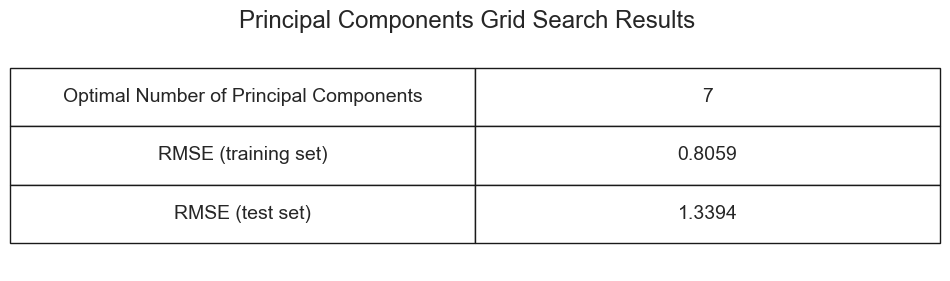

In [36]:
fig, ax = plt.subplots(figsize=(6, 3))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=table_content,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(14)
fig.suptitle("Principal Components Grid Search Results", fontsize="x-large")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d8_gridsearch", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

# Clustering analysis

## D9

In [37]:
data3_numerical

,longitude,latitude,housingMedianAge,medianIncome,medianHouseValue,meanRooms,meanBedrooms,meanOccupation
0,-122.23,37.88,41,8.3252,4.526,6.984127,1.023810,2.555556
1,-122.22,37.86,21,8.3014,3.585,6.238137,0.971880,2.109842
2,-122.24,37.85,52,7.2574,3.521,8.288136,1.073446,2.802260
3,-122.25,37.85,52,5.6431,3.413,5.817352,1.073059,2.547945
4,-122.25,37.85,52,3.8462,3.422,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1.5603,0.781,5.045455,1.133333,2.560606
20636,-121.21,39.49,18,2.5568,0.771,6.114035,1.315789,3.122807
20637,-121.22,39.43,17,1.7000,0.923,5.205543,1.120092,2.325635
20638,-121.32,39.43,18,1.8672,0.847,5.329513,1.171920,2.123209


### A

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Add cluster labels to the DataFrame
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

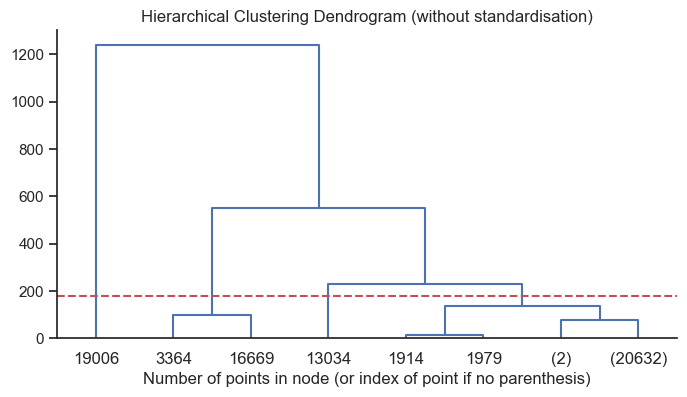

Cluster Means (Without Standardisation):
          longitude   latitude  housingMedianAge  medianIncome  meanRooms  \
Cluster                                                                     
0       -119.569411  35.631367         28.636364      3.870154   5.428809   
1       -121.980000  38.320000         45.000000     10.226400   3.166667   
2       -120.605000  37.865000         41.000000      4.890900   7.109890   
3       -121.150000  38.690000         52.000000      6.135900   8.275862   

         meanBedrooms  meanOccupation  
Cluster                                
0            1.096655        2.946435  
1            0.833333     1243.333333  
2            1.225275      551.087912  
3            1.517241      230.172414  
------------------------------------------------------------
Cluster Sizes (Without Standardisation):
Cluster
0    20636
2        2
3        1
1        1
Name: count, dtype: int64


In [39]:
from sklearn.cluster import AgglomerativeClustering


X = data3_numerical.drop(["medianHouseValue"], axis=1)


model = AgglomerativeClustering(
    n_clusters=4, metric="euclidean", linkage="average", compute_distances=True
)
model = model.fit(X)

plt.figure(figsize=(8, 4))
plt.title("Hierarchical Clustering Dendrogram (without standardisation)")
plot_dendrogram(model, truncate_mode="level", p=4, color_threshold=6.5)
plt.axhline(y=180, color="r", linestyle="--")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
save_fig("d9_a", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()


X["Cluster"] = model.labels_


# Calculate and print the mean of the variables for each cluster
cluster_means = X.groupby("Cluster").mean()
print("Cluster Means (Without Standardisation):")
print(cluster_means)



print("-" * 60)


# Print the size of each cluster


cluster_sizes = X["Cluster"].value_counts()
print("Cluster Sizes (Without Standardisation):")
print(cluster_sizes)

In [40]:
rounded = cluster_means.round(2)
rounded

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOccupation
Cluster,,,,,,,
0,-119.57,35.63,28.64,3.87,5.43,1.10,2.95
1,-121.98,38.32,45.00,10.23,3.17,0.83,1243.33
2,-120.60,37.86,41.00,4.89,7.11,1.23,551.09
3,-121.15,38.69,52.00,6.14,8.28,1.52,230.17


### B

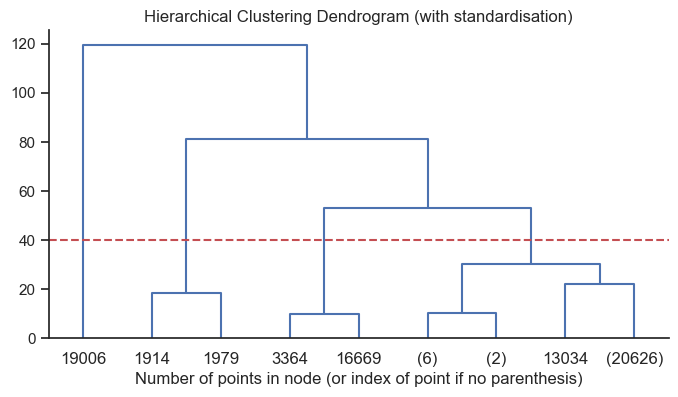

Cluster Means (With Standardisation):
                longitude  latitude  housingMedianAge  medianIncome  \
Cluster_Scaled                                                        
0                0.000134 -0.000309         -0.000196     -0.000183   
1               -0.516748  1.045525          0.982143      0.537026   
2               -0.259695  1.509030          0.386207     -0.326708   
3               -1.203053  1.258550          1.299975      3.345515   

                meanRooms  meanBedrooms  meanOccupation  
Cluster_Scaled                                           
0               -0.005184     -0.005880       -0.010897  
1                0.679391      0.271365       52.766023  
2               53.268465     60.677100       -0.048818  
3               -0.914402     -0.555691      119.419103  
------------------------------------------------------------
Cluster Sizes (With Standardisation):
Cluster_Scaled
0    20635
2        2
1        2
3        1
Name: count, dtype: int64


In [41]:
X = data3_numerical.drop(["medianHouseValue"], axis=1)


scaler5 = StandardScaler()
X_scaled = pd.DataFrame(scaler5.fit_transform(X), columns=X.columns)


model = AgglomerativeClustering(
    n_clusters=4, metric="euclidean", linkage="average", compute_distances=True
)
model = model.fit(X_scaled)

plt.figure(figsize=(8, 4))
plt.title("Hierarchical Clustering Dendrogram (with standardisation)")
plot_dendrogram(model, truncate_mode="level", p=4, color_threshold=6.5)
plt.axhline(y=40, color="r", linestyle="--")
save_fig("d9_b", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.show()


X_scaled["Cluster_Scaled"] = model.labels_


# Calculate and print the mean of the variables for each cluster
standardised_cluster_means = X_scaled.groupby("Cluster_Scaled").mean()
print("Cluster Means (With Standardisation):")
print(standardised_cluster_means)
print("-" * 60)


# Print the size of each cluster
standardised_cluster_sizes = X_scaled["Cluster_Scaled"].value_counts()
print("Cluster Sizes (With Standardisation):")
print(standardised_cluster_sizes)

Effect of Scaling: Standardization ensures that all features contribute equally to the distance calculations, which can lead to different clustering results. It often makes the clustering more robust by eliminating the influence of different scales of the features.

In [42]:
rounded = standardised_cluster_means.round(2)
rounded

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOccupation
Cluster_Scaled,,,,,,,
0,0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01
1,-0.52,1.05,0.98,0.54,0.68,0.27,52.77
2,-0.26,1.51,0.39,-0.33,53.27,60.68,-0.05
3,-1.20,1.26,1.30,3.35,-0.91,-0.56,119.42


### C

In [43]:
from sklearn.cluster import KMeans


X = data3_numerical.drop(["medianHouseValue"], axis=1)
scaler6 = StandardScaler()
X_scaled = pd.DataFrame(scaler6.fit_transform(X), columns=X.columns)


initial_centroids = standardised_cluster_means.values
kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1, random_state=5508)
kmeans.fit(X_scaled)


X_scaled["Cluster_Scaled"] = kmeans.labels_


# Calculate and print the mean of the variables for each cluster
standardised_cluster_means = X_scaled.groupby("Cluster_Scaled").mean()
print("Cluster Means (k-means With Standardisation):")
print(standardised_cluster_means)
print("-" * 60)


# Print the size of each cluster
standardised_cluster_sizes = X_scaled["Cluster_Scaled"].value_counts()
print("Cluster Sizes (k-means With Standardisation):")
print(standardised_cluster_sizes)

Cluster Means (k-means With Standardisation):
                longitude  latitude  housingMedianAge  medianIncome  \
Cluster_Scaled                                                        
0                0.000134 -0.000309         -0.000196     -0.000183   
1               -0.516748  1.045525          0.982143      0.537026   
2               -0.259695  1.509030          0.386207     -0.326708   
3               -1.203053  1.258550          1.299975      3.345515   

                meanRooms  meanBedrooms  meanOccupation  
Cluster_Scaled                                           
0               -0.005184     -0.005880       -0.010897  
1                0.679391      0.271365       52.766023  
2               53.268465     60.677100       -0.048818  
3               -0.914402     -0.555691      119.419103  
------------------------------------------------------------
Cluster Sizes (k-means With Standardisation):
Cluster_Scaled
0    20635
2        2
1        2
3        1
Name: count, 

c:\Users\chaoz\miniconda3\envs\cits5508\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\chaoz\miniconda3\envs\cits5508\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [44]:
rounded = standardised_cluster_means.round(2)
rounded

,longitude,latitude,housingMedianAge,medianIncome,meanRooms,meanBedrooms,meanOccupation
Cluster_Scaled,,,,,,,
0,0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01
1,-0.52,1.05,0.98,0.54,0.68,0.27,52.77
2,-0.26,1.51,0.39,-0.33,53.27,60.68,-0.05
3,-1.20,1.26,1.30,3.35,-0.91,-0.56,119.42


### D

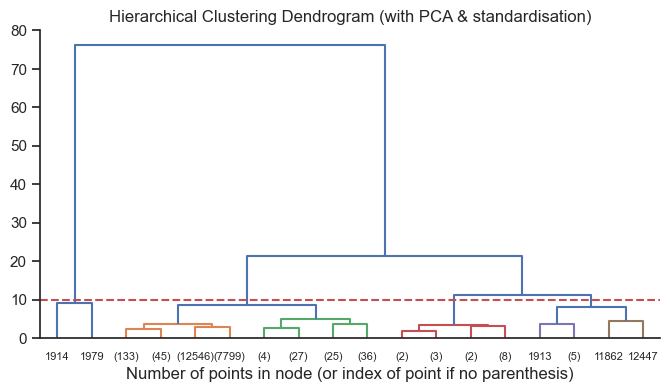

Cluster Means (With PCA & Standardisation):
                     pca0       pca1
Cluster_Scaled                      
0               54.809302  52.932335
1               20.594681  19.658176
2               -0.022605  -0.021351
3               12.774548  11.801539
------------------------------------------------------------
Cluster Sizes (With PCA & Standardisation):
Cluster_Scaled
2    20615
3       15
1        8
0        2
Name: count, dtype: int64


In [45]:
X = data3_numerical.drop(["medianHouseValue"], axis=1)
scaler7 = StandardScaler()
X_scaled = pd.DataFrame(scaler7.fit_transform(X), columns=X.columns)

pca = PCA(n_components=2, random_state=5508)
X_scaled_pca = pd.DataFrame(
    pca.fit_transform(X_scaled), columns=pca.get_feature_names_out()
)


model = AgglomerativeClustering(
    n_clusters=4, metric="euclidean", linkage="average", compute_distances=True
)
model = model.fit(X_scaled_pca)


plt.figure(figsize=(8, 4))
plt.title("Hierarchical Clustering Dendrogram (with PCA & standardisation)")
plot_dendrogram(model, truncate_mode="level", p=4, color_threshold=6.5)
plt.axhline(y=10, color="r", linestyle="--")
plt.xticks(fontsize=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
save_fig("d9_d1", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()


X_scaled_pca["Cluster_Scaled"] = model.labels_


# Calculate and print the mean of the variables for each cluster
standardised_cluster_means = X_scaled_pca.groupby("Cluster_Scaled").mean()
print("Cluster Means (With PCA & Standardisation):")
print(standardised_cluster_means)
print("-" * 60)


# Print the size of each cluster
standardised_cluster_sizes = X_scaled_pca["Cluster_Scaled"].value_counts()
print("Cluster Sizes (With PCA & Standardisation):")
print(standardised_cluster_sizes)

In [46]:
rounded = standardised_cluster_means.round(2)
rounded

,pca0,pca1
Cluster_Scaled,,
0,54.81,52.93
1,20.59,19.66
2,-0.02,-0.02
3,12.77,11.80


<Figure size 800x400 with 0 Axes>

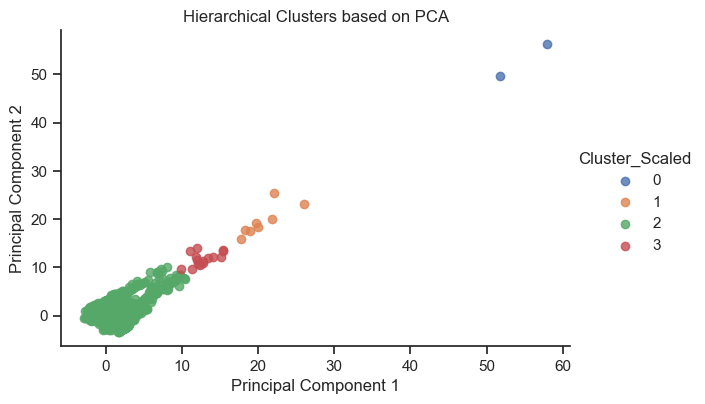

In [47]:
plt.figure(figsize=(8, 4))
sns.lmplot(
    data=X_scaled_pca,
    x=X_scaled_pca.columns[0],
    y=X_scaled_pca.columns[1],
    hue=X_scaled_pca.columns[2],
    fit_reg=False,
    legend=True,
    height=4,
    aspect=1.5,
)
plt.title("Hierarchical Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
save_fig("d9_d2", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

### E

In [48]:
X = data3_numerical.drop(["medianHouseValue"], axis=1)
scaler8 = StandardScaler()
X_scaled = pd.DataFrame(scaler8.fit_transform(X), columns=X.columns)

pca = PCA(n_components=2, random_state=5508)
X_scaled_pca = pd.DataFrame(
    pca.fit_transform(X_scaled), columns=pca.get_feature_names_out()
)

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=1, random_state=5508)
kmeans.fit(X_scaled_pca)

X_scaled_pca["Cluster_Scaled"] = kmeans.labels_

# Calculate and print the mean of the variables for each cluster
standardised_cluster_means = X_scaled_pca.groupby("Cluster_Scaled").mean()
print("Cluster Means (With PCA & Standardisation):")
print(standardised_cluster_means)
print("-" * 60)


# Print the size of each cluster
standardised_cluster_sizes = X_scaled_pca["Cluster_Scaled"].value_counts()
print("Cluster Sizes (With PCA & Standardisation):")
print(standardised_cluster_sizes)

Cluster Means (With PCA & Standardisation):
                     pca0       pca1
Cluster_Scaled                      
0               -0.878954   0.677287
1                1.103140  -1.057120
2                7.055080   6.787352
3               28.508957  27.478603
------------------------------------------------------------
Cluster Sizes (With PCA & Standardisation):
Cluster_Scaled
0    11939
1     8583
2      109
3        9
Name: count, dtype: int64


In [49]:
rounded = standardised_cluster_means.round(2)
rounded

,pca0,pca1
Cluster_Scaled,,
0,-0.88,0.68
1,1.10,-1.06
2,7.06,6.79
3,28.51,27.48


<Figure size 800x400 with 0 Axes>

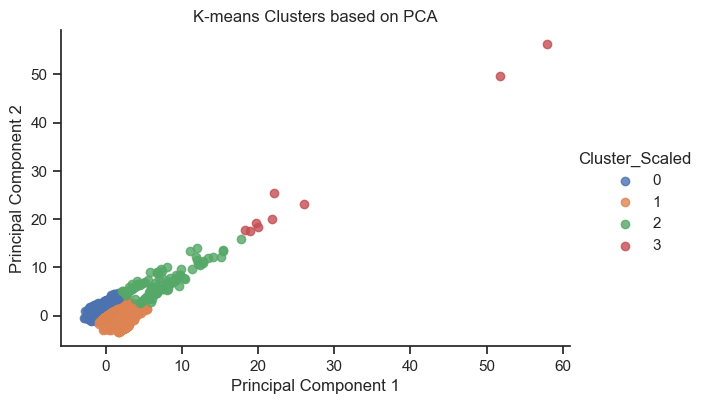

In [50]:
plt.figure(figsize=(8, 4))
sns.lmplot(
    data=X_scaled_pca,
    x=X_scaled_pca.columns[0],
    y=X_scaled_pca.columns[1],
    hue=X_scaled_pca.columns[2],
    fit_reg=False,
    legend=True,
    height=4,
    aspect=1.5,
)
plt.title("K-means Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
save_fig("d9_e", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

## D10

### A

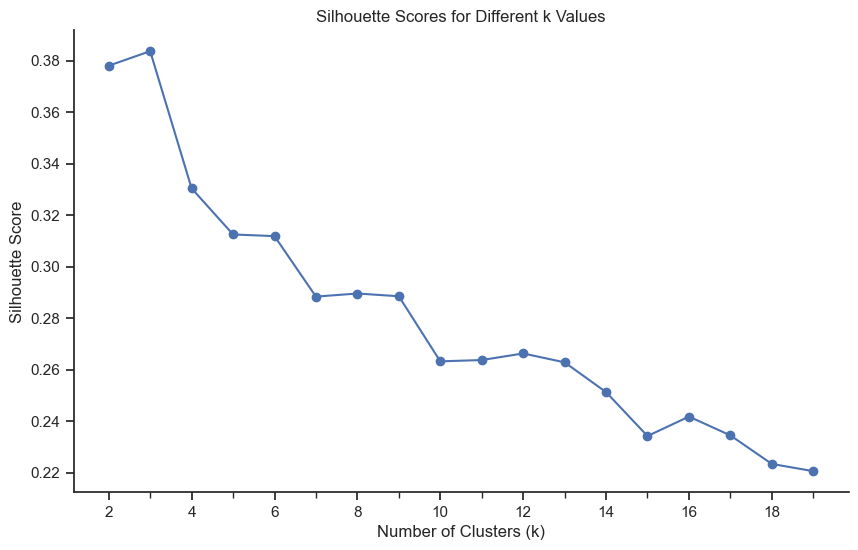

The optimal number of clusters is =  3


In [51]:
from sklearn.metrics import silhouette_score
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

X = data3_numerical.drop(["medianHouseValue"], axis=1)
scaler9 = StandardScaler()
X_scaled = pd.DataFrame(scaler9.fit_transform(X), columns=X.columns)

# Silhouette scores
scores = []

for k in range(2, 20, 1):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=1, random_state=5508)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    # labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    scores.append(silhouette)

# Plot silhouette scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker="o")
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
save_fig("d10_a", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

optimal_k = range(2, 20)[np.argmax(scores)]
print("The optimal number of clusters is = ", optimal_k)

### B

In [52]:
X = data3_numerical.drop(["medianHouseValue"], axis=1)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

pca = PCA(n_components=2, random_state=5508)
X_scaled_pca = pd.DataFrame(
    pca.fit_transform(X_scaled), columns=pca.get_feature_names_out()
)

kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=1, random_state=5508)
kmeans.fit(X_scaled_pca)

X_scaled_pca["Cluster_Scaled"] = kmeans.labels_

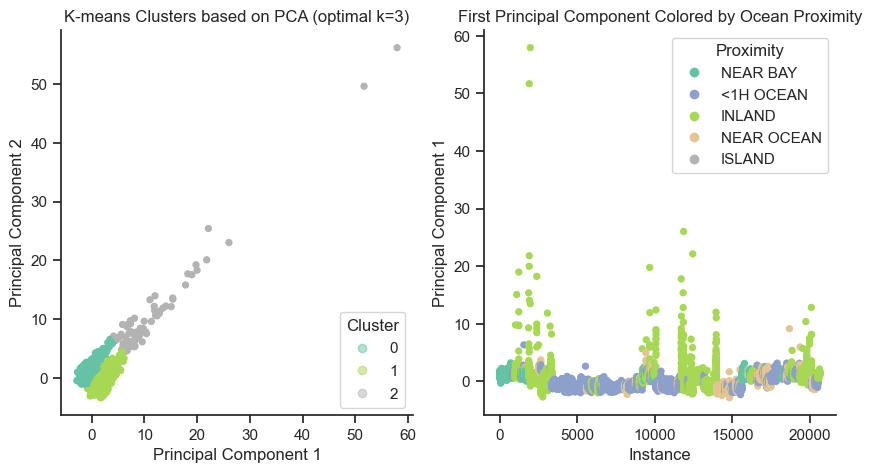

In [53]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(
    X_scaled_pca.iloc[:, 0],
    X_scaled_pca.iloc[:, 1],
    c=X_scaled_pca.iloc[:, 2],
    cmap=my_cmap,
    s=18,
    alpha=1,
)
# Produce labels and legends: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
handles, labels = scatter.legend_elements(prop="colors", alpha=0.5)
plt.legend(handles, labels, loc="lower right", title="Cluster")
plt.title(f"K-means Clusters based on PCA (optimal k={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.subplot(1, 2, 2)

proximity_colors = {
    "NEAR BAY": 0,
    "<1H OCEAN": 1,
    "INLAND": 2,
    "NEAR OCEAN": 3,
    "ISLAND": 4,
}

colors = dataset["oceanProximity"].map(proximity_colors)

scatter = plt.scatter(
    range(len(X_scaled_pca)),
    X_scaled_pca.iloc[:, 0],
    c=colors,
    cmap=my_cmap,
    s=18,
    alpha=1,
)
plt.title("First Principal Component Colored by Ocean Proximity")
plt.ylabel("Principal Component 1")
plt.xlabel("Instance")
# Produce labels and legends: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
handles, labels = scatter.legend_elements(prop="colors", alpha=1)
labels = dataset["oceanProximity"].unique()
plt.legend(handles, labels, loc="upper right", title="Proximity")

save_fig("d10_b", tight_layout=False)
plt.show()

In [54]:
len(X_scaled_pca)

20640

In [55]:
X_scaled_pca.iloc[:, 0]

0        1.654222
1        1.548547
2        1.842164
3        1.255515
4        1.255270
           ...   
20635    1.185632
20636    1.698943
20637    1.274033
20638    1.377552
20639    1.358001
Name: pca0, Length: 20640, dtype: float64